<a href="https://colab.research.google.com/github/shriyashrestha525/salesPredictionXgBoost/blob/main/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = '/content/drive/MyDrive/ML/archive/Train.csv'
test = '/content/drive/MyDrive/ML/archive/Test.csv'

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv(train)
test_data = pd.read_csv(test)

In [ ]:
test_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1906,NCN55,NaN,Low Fat,0.059202,Others,239.3538,OUT027,1985,Medium,Tier 3,Supermarket Type3
5520,FDG46,8.63,Regular,0.032903,Snack Foods,115.7518,OUT035,2004,Small,Tier 2,Supermarket Type1
70,NCX06,17.60,Low Fat,0.015711,Household,180.0976,OUT049,1999,Medium,Tier 1,Supermarket Type1
516,FDC53,NaN,Low Fat,0.015470,Frozen Foods,100.4384,OUT019,1985,Small,Tier 1,Grocery Store
2562,FDQ12,12.65,Low Fat,0.035555,Baking Goods,228.5010,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [ ]:
test_data.shape

(5681, 11)

In [ ]:
train_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4213,FDP28,13.65,Regular,0.080804,Frozen Foods,261.1936,OUT045,2002,NaN,Tier 2,Supermarket Type1,2348.9424
4531,DRL37,15.50,Low Fat,0.053328,Soft Drinks,44.4770,OUT013,1987,High,Tier 3,Supermarket Type1,865.5400
7919,FDU34,18.25,Low Fat,0.075312,Snack Foods,122.6046,OUT049,1999,Medium,Tier 1,Supermarket Type1,2988.1104
6575,FDA52,NaN,Regular,0.127800,Frozen Foods,177.0370,OUT027,1985,Medium,Tier 3,Supermarket Type3,4587.3620
1133,FDM08,10.10,reg,0.053574,Fruits and Vegetables,223.7088,OUT035,2004,Small,Tier 2,Supermarket Type1,2684.5056


In [ ]:
train_data.shape

(8523, 12)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train_data.corr()['Item_Outlet_Sales']

<ipython-input-61-73434d4397bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()['Item_Outlet_Sales']


Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

while handling missing values we either impute(mean) the missing value i.e we replace missing value with mean of the column. Or, we replace the missing value with mode i.e with the class that is repeated most frequently in the given column. Generally we use mean technique for numerical data and mode technique for non numeric data.

In [ ]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace = True)

In [ ]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

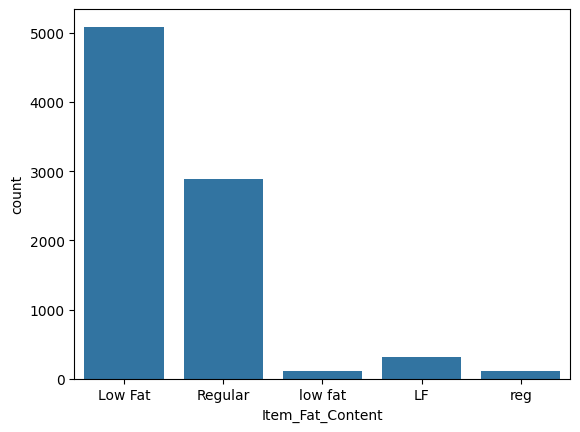

In [ ]:
sns.countplot(x='Item_Fat_Content', data = train_data)

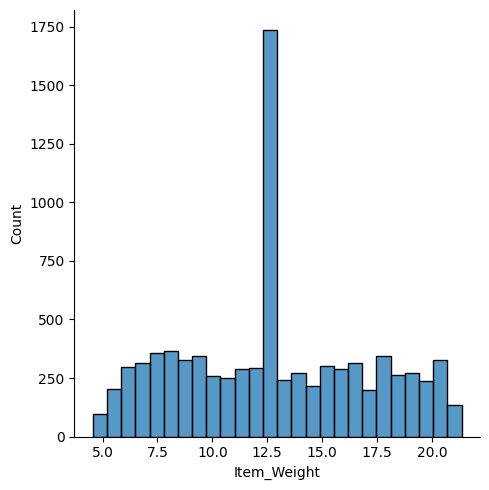

In [ ]:
sns.displot(train_data['Item_Weight'])

In [ ]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
train_data.replace({'Item_Fat_Content': {'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg': 'Regular'}}, inplace = True)


In [ ]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
train_data['Item_Fat_Content'] = encoder.fit_transform(train_data['Item_Fat_Content'])
train_data['Outlet_Size'] = encoder.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type'] = encoder.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type'] = encoder.fit_transform(train_data['Outlet_Type'])

In [ ]:
train_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7509,FDT40,12.857645,0,0.095331,Frozen Foods,125.5678,OUT027,1985,1,2,3,2543.3560
7784,NCU18,15.100000,0,0.055829,Household,140.2496,OUT035,2004,2,1,1,2681.8424
7273,FDM44,12.500000,0,0.051971,Fruits and Vegetables,103.6990,OUT010,1998,1,2,0,412.7960
2363,FDS43,11.650000,0,0.040744,Fruits and Vegetables,185.9240,OUT017,2007,1,1,1,4101.3280
7334,NCB55,15.700000,0,0.160989,Household,57.8562,OUT045,2002,1,1,1,651.8182


In [ ]:
import numpy as np

In [ ]:
one_hot_encoded_data = pd.get_dummies(train_data, columns = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier'])
print(one_hot_encoded_data)


      Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0           9.300                 0         0.016047  249.8092   
1           5.920                 1         0.019278   48.2692   
2          17.500                 0         0.016760  141.6180   
3          19.200                 1         0.000000  182.0950   
4           8.930                 0         0.000000   53.8614   
...           ...               ...              ...       ...   
8518        6.865                 0         0.056783  214.5218   
8519        8.380                 1         0.046982  108.1570   
8520       10.600                 0         0.035186   85.1224   
8521        7.210                 1         0.145221  103.1332   
8522       14.800                 0         0.044878   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                          1999            1                     0   
1                          2009            1                     2 

In [ ]:
x = one_hot_encoded_data.drop('Item_Outlet_Sales', axis = 'columns')
y = one_hot_encoded_data['Item_Outlet_Sales']

In [ ]:
print(x.sample(5))
print(y.sample(5))

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
5192     9.600000                 0         0.049618   44.2086   
7375    10.300000                 0         0.146768  102.3648   
6522    12.150000                 0         0.037955   62.8826   
4834    13.100000                 0         0.074940   75.0354   
6139    12.857645                 0         0.054870   40.5480   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
5192                       1998            1                     2   
7375                       2009            1                     2   
6522                       1999            1                     0   
4834                       1997            2                     0   
6139                       1985            2                     0   

      Outlet_Type  Item_Identifier_DRA12  Item_Identifier_DRA24  ...  \
5192            0                      0                      0  ...   
7375            2                     

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_predic = model.predict(x_train)

In [ ]:
from sklearn.metrics import r2_score
acc = r2_score(y_train, y_predic)

In [ ]:
acc

0.6383190838708328

In [ ]:
y_pred = model.predict(x_test)
accu = r2_score(y_test, y_pred)

In [ ]:
accu

0.5988011372302418